In [1]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [2]:
# Read the posterior samples
posterior_dict = {}
base_dir = "/home/czc/projects/working/LIGO_posterior"


list_evO1O2 = ["150914", "151012", "151226", "170104", "170608", "170729", "170809", "170814", "170818", "170823"]
for event in list_evO1O2:
    print(event)
    filename = f"{base_dir}/GWTC-1/GW{event}_GWTC-1.hdf5"
    pos_samples = posterior_samples(filename)
    posterior_dict[event] = pos_samples



list_evO3a = ["190408_181802", "190412", "190413_134308", "190421_213856", "190503_185404", "190512_180714", "190513_205428", "190517_055101", "190519_153544", "190521", "190521_074359", "190527_092055", "190602_175927", "190620_030421", "190630_185205", "190701_203306", "190706_222641", "190707_093326", "190708_232457", "190720_000836", "190727_060333", "190728_064510", "190803_022701", "190828_063405", "190828_065509", "190910_112807",
                           "190915_235702", "190924_021846", "190925_232845", "190929_012149", "190930_133541", "190413_052954", "190719_215514", "190725_174728", "190731_140936", "190805_211137"]
for event in list(list_evO3a):
    if event != '190814':
        print(event)
        filename = f"{base_dir}/GWTC-2/GW{event}.h5"
        pos_samples = posterior_samples(filename)
        posterior_dict[event] = pos_samples


list_evO3b = ["191105_143521", "191109_010717", "191127_050227", "191129_134029", "191204_171526", "191215_223052", "191216_213338", "191222_033537", "191230_180458", "200112_155838", "200128_022011", "200129_065458", "200202_154313", "200208_130117",
              "200209_085452", "200219_094415", "200224_222234", "200225_060421", "200302_015811", "200311_115853", "200316_215756", "191103_012549", "200216_220804"]
for event in list(list_evO3b):
    print(event)
    filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-GW{event}_PEDataRelease_mixed_nocosmo.h5"
    pos_samples = posterior_samples(filename, waveform='C01:Mixed')
    posterior_dict[event] = pos_samples

print(f"Using {len(posterior_dict)} events.")



150914
Using Overall_posterior posterior with a total of 8350 samples
151012
Using Overall_posterior posterior with a total of 16096 samples
151226
Using Overall_posterior posterior with a total of 52252 samples
170104
Using Overall_posterior posterior with a total of 24972 samples
170608
Using Overall_posterior posterior with a total of 6448 samples
170729
Using Overall_posterior posterior with a total of 5112 samples
170809
Using Overall_posterior posterior with a total of 14802 samples
170814
Using Overall_posterior posterior with a total of 40000 samples
170818
Using Overall_posterior posterior with a total of 5862 samples
170823
Using Overall_posterior posterior with a total of 4278 samples
190408_181802
Using PublicationSamples posterior with a total of 37366 samples
190412
Using PublicationSamples posterior with a total of 23984 samples
190413_134308
Using PublicationSamples posterior with a total of 38056 samples
190421_213856
Using PublicationSamples posterior with a total of 

In [3]:
# # Read the posterior samples
# posterior_dict = {}
# base_dir = "/home/czc/projects/working/LIGO_posterior"

# list_evO1O2 = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O1', 'O2'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO1O2.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-1/{event}_GWTC-1.hdf5"
#     pos_samples = posterior_samples(filename)
#     posterior_dict[event] = pos_samples

# list_evO3a = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3a'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3a.keys()):
#     if event != 'GW190814':
#         print(event)
#         filename = f"{base_dir}/GWTC-2/{event}.h5"
#         pos_samples = posterior_samples(filename)
#         posterior_dict[event] = pos_samples

# list_evO3b = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3b'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3b.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-{event}_PEDataRelease_mixed_nocosmo.h5"
#     pos_samples = posterior_samples(filename, waveform='C01:Mixed')
#     posterior_dict[event] = pos_samples

# print(f"Using {len(posterior_dict)} events.")

In [4]:
population_model = "PBH-bpower-2nd"
cosmology_model = 'flatLCDM'
outdir = f'H0_GWTC-3_{population_model}_{cosmology_model}_5/'
injections.update_cut(snr_cut=9, ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [5]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
from bilby.core.prior import Uniform
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315

# prior_dict['ms'] = Uniform(5.0, 15.0, name='$m_*$')
# prior_dict['α1'] = Uniform(0.0, 80.0, name='$\\alpha_1$')
# prior_dict['α2'] = Uniform(1.0, 3.0, name='$\\alpha_2$')
# prior_dict['log_fpbh'] = Uniform(-3.0, 0.0, name='$\\log_{10}fpbh$')

prior_dict

{'ms': Uniform(minimum=3.0, maximum=15.0, name='$m_*$', latex_label='$m_*$', unit=None, boundary=None),
 'α1': Uniform(minimum=0.0, maximum=15.0, name='$\\alpha_1$', latex_label='$\\alpha_1$', unit=None, boundary=None),
 'α2': Uniform(minimum=1.0, maximum=3.0, name='$\\alpha_2$', latex_label='$\\alpha_2$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

19:33 bilby INFO    : Running for label 'dynesty', output will be saved to 'H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5/'
19:33 bilby INFO    : Search parameters:
19:33 bilby INFO    :   ms = Uniform(minimum=3.0, maximum=15.0, name='$m_*$', latex_label='$m_*$', unit=None, boundary=None)
19:33 bilby INFO    :   α1 = Uniform(minimum=0.0, maximum=15.0, name='$\\alpha_1$', latex_label='$\\alpha_1$', unit=None, boundary=None)
19:33 bilby INFO    :   α2 = Uniform(minimum=1.0, maximum=3.0, name='$\\alpha_2$', latex_label='$\\alpha_2$', unit=None, boundary=None)
19:33 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None)
19:33 bilby INFO    :   H0 = 67.4
19:33 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


19:35 bilby INFO    : Single likelihood evaluation took 1.067e+00 s


0it [00:00, ?it/s]

19:35 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 32, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f8da0ba2400>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
19:35 bilby INFO    : Checkpoint every check_point_delta_t = 60s
19:35 bilby INFO    : Using dynesty version 1.0.1
19:35 bilby INFO    : Using the bilby-implemented rwalk sampl

801it [19:44,  3.76it/s, bound:0 nc:  6 ncall:2.5e+03 eff:32.2% logz=-1881.71+/-0.15 dlogz:114.104>0.1]   

19:55 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


980it [20:45,  1.86it/s, bound:0 nc:  4 ncall:3.5e+03 eff:27.9% logz=-1850.12+/-0.14 dlogz:81.971>0.1] 

19:56 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1105it [21:47,  1.81it/s, bound:0 nc: 10 ncall:4.5e+03 eff:24.5% logz=-1836.16+/-0.14 dlogz:67.726>0.1]

19:57 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1310it [23:48,  1.10it/s, bound:0 nc: 28 ncall:6.5e+03 eff:20.1% logz=-1817.64+/-0.15 dlogz:48.776>0.1]

19:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1384it [24:51,  1.02s/it, bound:0 nc: 21 ncall:7.6e+03 eff:18.3% logz=-1813.64+/-0.14 dlogz:44.607>0.1]

20:00 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1447it [25:53,  1.51s/it, bound:0 nc: 20 ncall:8.5e+03 eff:16.9% logz=-1809.97+/-0.14 dlogz:40.827>0.1]

20:01 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1488it [26:55,  1.24s/it, bound:0 nc: 17 ncall:9.6e+03 eff:15.6% logz=-1808.13+/-0.14 dlogz:38.881>0.1]

20:02 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1545it [27:55,  1.82s/it, bound:0 nc: 58 ncall:1.1e+04 eff:14.6% logz=-1805.32+/-0.14 dlogz:35.963>0.1]

20:03 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1612it [28:57,  1.22s/it, bound:0 nc: 13 ncall:1.2e+04 eff:13.9% logz=-1802.29+/-0.15 dlogz:32.802>0.1]

20:04 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1659it [30:00,  1.31s/it, bound:0 nc: 47 ncall:1.3e+04 eff:13.2% logz=-1800.34+/-0.15 dlogz:30.750>0.1]

20:05 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1693it [31:02,  2.68s/it, bound:0 nc: 39 ncall:1.4e+04 eff:12.4% logz=-1799.23+/-0.14 dlogz:29.558>0.1]

20:06 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1765it [33:05,  2.46s/it, bound:0 nc: 59 ncall:1.6e+04 eff:11.3% logz=-1796.87+/-0.15 dlogz:27.056>0.1]

20:08 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1797it [34:06,  1.93s/it, bound:0 nc: 82 ncall:1.7e+04 eff:10.8% logz=-1795.77+/-0.15 dlogz:25.896>0.1]

20:09 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1826it [35:15,  4.29s/it, bound:0 nc:177 ncall:1.8e+04 eff:10.2% logz=-1794.78+/-0.15 dlogz:24.838>0.1]

20:10 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1842it [36:54, 18.73s/it, bound:1 nc: 56 ncall:1.8e+04 eff:10.0% logz=-1794.33+/-0.15 dlogz:24.363>0.1]

20:12 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1874it [37:56,  3.22s/it, bound:4 nc: 30 ncall:2.0e+04 eff:9.6% logz=-1793.47+/-0.15 dlogz:23.440>0.1] 

20:13 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1932it [39:49,  2.21s/it, bound:10 nc: 21 ncall:2.1e+04 eff:9.0% logz=-1791.99+/-0.15 dlogz:21.843>0.1]

20:15 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2017it [41:44,  1.57s/it, bound:17 nc: 21 ncall:2.4e+04 eff:8.5% logz=-1789.94+/-0.15 dlogz:19.614>0.1]

20:17 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2072it [43:33,  1.88s/it, bound:22 nc: 24 ncall:2.5e+04 eff:8.2% logz=-1788.74+/-0.15 dlogz:18.309>0.1]

20:19 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2129it [45:08,  1.93s/it, bound:27 nc: 28 ncall:2.7e+04 eff:8.0% logz=-1787.60+/-0.15 dlogz:17.053>0.1]

20:20 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2188it [46:58,  1.91s/it, bound:32 nc: 26 ncall:2.9e+04 eff:7.7% logz=-1786.54+/-0.15 dlogz:15.874>0.1]

20:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2267it [49:03,  1.73s/it, bound:40 nc: 42 ncall:3.1e+04 eff:7.3% logz=-1785.26+/-0.15 dlogz:14.846>0.1]

20:24 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2340it [51:27,  1.99s/it, bound:46 nc: 36 ncall:3.3e+04 eff:7.1% logz=-1784.06+/-0.15 dlogz:13.501>0.1]

20:27 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2369it [52:28,  2.12s/it, bound:50 nc: 28 ncall:3.4e+04 eff:7.0% logz=-1783.64+/-0.15 dlogz:13.019>0.1]

20:28 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2399it [53:29,  2.17s/it, bound:53 nc: 31 ncall:3.5e+04 eff:6.9% logz=-1783.23+/-0.15 dlogz:12.554>0.1]

20:29 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2458it [55:32,  2.17s/it, bound:59 nc: 32 ncall:3.7e+04 eff:6.7% logz=-1782.53+/-0.15 dlogz:11.944>0.1]

20:31 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2518it [57:36,  2.18s/it, bound:65 nc: 38 ncall:3.9e+04 eff:6.5% logz=-1781.90+/-0.15 dlogz:11.188>0.1]

20:33 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2577it [59:39,  2.18s/it, bound:72 nc: 34 ncall:4.1e+04 eff:6.3% logz=-1781.31+/-0.15 dlogz:10.481>0.1]

20:35 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2608it [1:00:44,  2.24s/it, bound:75 nc: 35 ncall:4.2e+04 eff:6.2% logz=-1781.02+/-0.15 dlogz:10.133>0.1]

20:36 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2635it [1:01:46,  2.35s/it, bound:78 nc: 30 ncall:4.3e+04 eff:6.1% logz=-1780.79+/-0.15 dlogz:9.845>0.1] 

20:37 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2666it [1:02:49,  2.25s/it, bound:82 nc: 32 ncall:4.4e+04 eff:6.0% logz=-1780.52+/-0.15 dlogz:9.510>0.1]

20:38 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2695it [1:03:51,  2.27s/it, bound:85 nc: 33 ncall:4.5e+04 eff:6.0% logz=-1780.27+/-0.15 dlogz:9.207>0.1]

20:39 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2725it [1:04:56,  2.31s/it, bound:88 nc: 66 ncall:4.6e+04 eff:5.9% logz=-1780.00+/-0.15 dlogz:8.880>0.1]

20:40 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2785it [1:06:57,  2.14s/it, bound:95 nc: 26 ncall:4.8e+04 eff:5.8% logz=-1779.48+/-0.15 dlogz:8.238>0.1]

20:42 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2812it [1:08:04,  2.34s/it, bound:97 nc: 40 ncall:4.9e+04 eff:5.7% logz=-1779.27+/-0.15 dlogz:7.973>0.1]

20:43 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2844it [1:09:11,  2.29s/it, bound:101 nc: 37 ncall:5.0e+04 eff:5.6% logz=-1779.04+/-0.15 dlogz:7.679>0.1]

20:44 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2873it [1:10:19,  2.35s/it, bound:104 nc: 39 ncall:5.2e+04 eff:5.6% logz=-1778.84+/-0.15 dlogz:7.416>0.1]

20:46 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2904it [1:11:26,  2.63s/it, bound:108 nc: 31 ncall:5.3e+04 eff:5.5% logz=-1778.63+/-0.15 dlogz:7.146>0.1]

20:47 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2933it [1:12:32,  2.82s/it, bound:111 nc: 29 ncall:5.4e+04 eff:5.5% logz=-1778.44+/-0.15 dlogz:6.903>0.1]

20:48 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2963it [1:13:36,  2.77s/it, bound:115 nc: 38 ncall:5.5e+04 eff:5.4% logz=-1778.27+/-0.15 dlogz:6.665>0.1]

20:49 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2993it [1:14:43,  2.77s/it, bound:118 nc: 34 ncall:5.6e+04 eff:5.3% logz=-1778.10+/-0.15 dlogz:6.440>0.1]

20:50 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3024it [1:15:48,  2.65s/it, bound:122 nc: 35 ncall:5.7e+04 eff:5.3% logz=-1777.94+/-0.15 dlogz:6.215>0.1]

20:51 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3054it [1:16:50,  2.53s/it, bound:125 nc: 30 ncall:5.8e+04 eff:5.2% logz=-1777.79+/-0.15 dlogz:6.006>0.1]

20:52 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3081it [1:17:56,  2.67s/it, bound:129 nc: 36 ncall:5.9e+04 eff:5.2% logz=-1777.66+/-0.15 dlogz:5.824>0.1]

20:53 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3110it [1:18:59,  2.55s/it, bound:132 nc: 71 ncall:6.0e+04 eff:5.2% logz=-1777.52+/-0.15 dlogz:5.625>0.1]

20:54 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3138it [1:20:05,  2.57s/it, bound:135 nc: 36 ncall:6.1e+04 eff:5.1% logz=-1777.39+/-0.15 dlogz:5.440>0.1]

20:55 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3168it [1:21:11,  2.50s/it, bound:138 nc: 40 ncall:6.2e+04 eff:5.1% logz=-1777.25+/-0.15 dlogz:5.246>0.1]

20:56 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3198it [1:22:20,  2.48s/it, bound:142 nc: 69 ncall:6.4e+04 eff:5.0% logz=-1777.13+/-0.16 dlogz:5.059>0.1]

20:58 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3229it [1:23:28,  2.37s/it, bound:146 nc: 32 ncall:6.5e+04 eff:5.0% logz=-1777.00+/-0.16 dlogz:4.874>0.1]

20:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3260it [1:24:36,  2.29s/it, bound:149 nc: 40 ncall:6.6e+04 eff:4.9% logz=-1776.89+/-0.16 dlogz:4.696>0.1]

21:00 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3290it [1:25:44,  2.57s/it, bound:153 nc: 35 ncall:6.7e+04 eff:4.9% logz=-1776.78+/-0.16 dlogz:4.528>0.1]

21:01 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3321it [1:26:52,  2.62s/it, bound:156 nc: 34 ncall:6.8e+04 eff:4.9% logz=-1776.67+/-0.16 dlogz:4.358>0.1]

21:02 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3352it [1:27:59,  2.61s/it, bound:160 nc: 23 ncall:6.9e+04 eff:4.8% logz=-1776.56+/-0.16 dlogz:4.193>0.1]

21:03 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3383it [1:29:07,  2.55s/it, bound:163 nc: 36 ncall:7.1e+04 eff:4.8% logz=-1776.46+/-0.16 dlogz:4.030>0.1]

21:04 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3414it [1:30:15,  2.47s/it, bound:167 nc: 32 ncall:7.2e+04 eff:4.8% logz=-1776.36+/-0.16 dlogz:3.872>0.1]

21:06 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3445it [1:31:22,  2.38s/it, bound:171 nc: 40 ncall:7.3e+04 eff:4.7% logz=-1776.26+/-0.16 dlogz:3.720>0.1]

21:07 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:07 bilby INFO    : Writing 108 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3477it [1:32:30,  2.27s/it, bound:174 nc: 40 ncall:7.4e+04 eff:4.7% logz=-1776.17+/-0.16 dlogz:3.569>0.1]

21:08 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:08 bilby INFO    : Writing 105 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3508it [1:33:38,  2.58s/it, bound:178 nc: 37 ncall:7.5e+04 eff:4.7% logz=-1776.09+/-0.16 dlogz:3.427>0.1]

21:09 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:09 bilby INFO    : Writing 103 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3540it [1:34:45,  2.63s/it, bound:182 nc: 39 ncall:7.6e+04 eff:4.6% logz=-1776.00+/-0.16 dlogz:3.284>0.1]

21:10 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:10 bilby INFO    : Writing 110 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3568it [1:35:53,  2.80s/it, bound:185 nc: 33 ncall:7.7e+04 eff:4.6% logz=-1775.93+/-0.16 dlogz:3.162>0.1]

21:11 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:11 bilby INFO    : Writing 108 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3600it [1:37:01,  2.63s/it, bound:189 nc: 37 ncall:7.9e+04 eff:4.6% logz=-1775.86+/-0.16 dlogz:3.028>0.1]

21:12 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:12 bilby INFO    : Writing 129 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3631it [1:38:09,  2.53s/it, bound:193 nc: 36 ncall:8.0e+04 eff:4.5% logz=-1775.79+/-0.16 dlogz:2.902>0.1]

21:13 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:13 bilby INFO    : Writing 154 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3661it [1:39:17,  2.46s/it, bound:196 nc: 40 ncall:8.1e+04 eff:4.5% logz=-1775.72+/-0.16 dlogz:2.785>0.1]

21:15 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:15 bilby INFO    : Writing 133 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3692it [1:40:25,  2.35s/it, bound:200 nc: 40 ncall:8.2e+04 eff:4.5% logz=-1775.66+/-0.16 dlogz:2.668>0.1]

21:16 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:16 bilby INFO    : Writing 142 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3724it [1:41:34,  2.57s/it, bound:203 nc: 40 ncall:8.3e+04 eff:4.5% logz=-1775.60+/-0.16 dlogz:2.551>0.1]

21:17 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:17 bilby INFO    : Writing 159 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3754it [1:42:43,  2.70s/it, bound:207 nc: 59 ncall:8.5e+04 eff:4.4% logz=-1775.54+/-0.16 dlogz:2.445>0.1]

21:18 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:18 bilby INFO    : Writing 180 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3804it [1:44:30,  2.49s/it, bound:214 nc: 27 ncall:8.7e+04 eff:4.4% logz=-1775.45+/-0.16 dlogz:2.274>0.1]

21:20 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:20 bilby INFO    : Writing 197 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3825it [1:45:36,  3.13s/it, bound:216 nc: 57 ncall:8.7e+04 eff:4.4% logz=-1775.42+/-0.16 dlogz:2.205>0.1]

21:21 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:21 bilby INFO    : Writing 192 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3855it [1:46:43,  3.00s/it, bound:220 nc: 39 ncall:8.9e+04 eff:4.4% logz=-1775.37+/-0.16 dlogz:2.108>0.1]

21:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:22 bilby INFO    : Writing 209 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3884it [1:47:51,  2.93s/it, bound:223 nc: 38 ncall:9.0e+04 eff:4.3% logz=-1775.32+/-0.16 dlogz:2.018>0.1]

21:23 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:23 bilby INFO    : Writing 225 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3913it [1:48:59,  2.82s/it, bound:227 nc: 38 ncall:9.1e+04 eff:4.3% logz=-1775.28+/-0.16 dlogz:1.930>0.1]

21:24 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:24 bilby INFO    : Writing 267 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3943it [1:50:06,  2.69s/it, bound:230 nc: 37 ncall:9.2e+04 eff:4.3% logz=-1775.23+/-0.16 dlogz:1.842>0.1]

21:25 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:25 bilby INFO    : Writing 257 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3972it [1:51:13,  2.62s/it, bound:234 nc: 36 ncall:9.3e+04 eff:4.3% logz=-1775.19+/-0.16 dlogz:1.760>0.1]

21:26 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:26 bilby INFO    : Writing 247 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4002it [1:52:20,  2.48s/it, bound:237 nc: 36 ncall:9.4e+04 eff:4.2% logz=-1775.15+/-0.16 dlogz:1.677>0.1]

21:28 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:28 bilby INFO    : Writing 293 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4033it [1:53:28,  2.34s/it, bound:241 nc: 39 ncall:9.5e+04 eff:4.2% logz=-1775.11+/-0.16 dlogz:1.595>0.1]

21:29 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:29 bilby INFO    : Writing 329 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4064it [1:54:36,  2.61s/it, bound:245 nc: 39 ncall:9.7e+04 eff:4.2% logz=-1775.08+/-0.16 dlogz:1.517>0.1]

21:30 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:30 bilby INFO    : Writing 345 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4094it [1:55:45,  2.74s/it, bound:248 nc: 35 ncall:9.8e+04 eff:4.2% logz=-1775.04+/-0.16 dlogz:1.443>0.1]

21:31 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:31 bilby INFO    : Writing 343 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4123it [1:56:53,  2.76s/it, bound:252 nc: 39 ncall:9.9e+04 eff:4.2% logz=-1775.01+/-0.16 dlogz:1.374>0.1]

21:32 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:32 bilby INFO    : Writing 360 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4155it [1:58:03,  2.59s/it, bound:256 nc: 38 ncall:1.0e+05 eff:4.1% logz=-1774.97+/-0.16 dlogz:1.302>0.1]

21:33 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:33 bilby INFO    : Writing 390 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4185it [1:59:10,  2.49s/it, bound:259 nc: 40 ncall:1.0e+05 eff:4.1% logz=-1774.94+/-0.16 dlogz:1.236>0.1]

21:34 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:34 bilby INFO    : Writing 436 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4214it [2:00:18,  2.44s/it, bound:263 nc: 35 ncall:1.0e+05 eff:4.1% logz=-1774.91+/-0.16 dlogz:1.175>0.1]

21:36 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:36 bilby INFO    : Writing 445 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4244it [2:01:25,  2.68s/it, bound:267 nc: 40 ncall:1.0e+05 eff:4.1% logz=-1774.88+/-0.16 dlogz:1.115>0.1]

21:37 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:37 bilby INFO    : Writing 452 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4273it [2:02:33,  2.79s/it, bound:270 nc: 40 ncall:1.0e+05 eff:4.1% logz=-1774.86+/-0.16 dlogz:1.058>0.1]

21:38 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:38 bilby INFO    : Writing 516 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4302it [2:03:40,  2.80s/it, bound:274 nc: 34 ncall:1.1e+05 eff:4.1% logz=-1774.83+/-0.16 dlogz:1.005>0.1]

21:39 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:39 bilby INFO    : Writing 511 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4325it [2:04:44,  3.06s/it, bound:277 nc:104 ncall:1.1e+05 eff:4.0% logz=-1774.81+/-0.16 dlogz:0.964>0.1]

21:40 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:40 bilby INFO    : Writing 542 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4355it [2:05:54,  2.82s/it, bound:281 nc: 40 ncall:1.1e+05 eff:4.0% logz=-1774.79+/-0.16 dlogz:0.912>0.1]

21:41 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:41 bilby INFO    : Writing 609 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4384it [2:07:03,  2.72s/it, bound:285 nc: 40 ncall:1.1e+05 eff:4.0% logz=-1774.77+/-0.16 dlogz:0.865>0.1]

21:42 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:42 bilby INFO    : Writing 591 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4414it [2:08:13,  2.57s/it, bound:289 nc: 39 ncall:1.1e+05 eff:4.0% logz=-1774.74+/-0.16 dlogz:0.818>0.1]

21:43 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:43 bilby INFO    : Writing 685 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4444it [2:09:23,  2.80s/it, bound:293 nc: 38 ncall:1.1e+05 eff:4.0% logz=-1774.72+/-0.16 dlogz:0.774>0.1]

21:45 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:45 bilby INFO    : Writing 720 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4476it [2:10:33,  2.73s/it, bound:297 nc: 40 ncall:1.1e+05 eff:4.0% logz=-1774.70+/-0.16 dlogz:0.728>0.1]

21:46 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:46 bilby INFO    : Writing 737 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4507it [2:11:43,  2.65s/it, bound:301 nc: 40 ncall:1.1e+05 eff:3.9% logz=-1774.68+/-0.16 dlogz:0.687>0.1]

21:47 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:47 bilby INFO    : Writing 756 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4539it [2:12:53,  2.49s/it, bound:305 nc: 40 ncall:1.2e+05 eff:3.9% logz=-1774.66+/-0.16 dlogz:0.646>0.1]

21:48 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:48 bilby INFO    : Writing 823 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4571it [2:14:03,  2.33s/it, bound:309 nc: 40 ncall:1.2e+05 eff:3.9% logz=-1774.64+/-0.16 dlogz:0.607>0.1]

21:49 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:49 bilby INFO    : Writing 878 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4601it [2:15:15,  2.63s/it, bound:312 nc: 40 ncall:1.2e+05 eff:3.9% logz=-1774.62+/-0.16 dlogz:0.573>0.1]

21:51 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:51 bilby INFO    : Writing 1016 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4632it [2:16:25,  2.65s/it, bound:316 nc: 80 ncall:1.2e+05 eff:3.9% logz=-1774.61+/-0.16 dlogz:0.539>0.1]

21:52 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:52 bilby INFO    : Writing 1000 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4664it [2:17:36,  2.53s/it, bound:320 nc: 40 ncall:1.2e+05 eff:3.9% logz=-1774.59+/-0.16 dlogz:0.507>0.1]

21:53 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:53 bilby INFO    : Writing 1084 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4696it [2:18:47,  2.40s/it, bound:324 nc: 40 ncall:1.2e+05 eff:3.8% logz=-1774.58+/-0.16 dlogz:0.476>0.1]

21:54 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:54 bilby INFO    : Writing 1183 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4727it [2:19:58,  2.65s/it, bound:328 nc: 40 ncall:1.2e+05 eff:3.8% logz=-1774.56+/-0.16 dlogz:0.448>0.1]

21:55 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:55 bilby INFO    : Writing 1253 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4757it [2:21:06,  2.68s/it, bound:332 nc: 33 ncall:1.2e+05 eff:3.8% logz=-1774.55+/-0.16 dlogz:0.422>0.1]

21:56 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:56 bilby INFO    : Writing 1298 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4781it [2:22:15,  2.96s/it, bound:336 nc: 38 ncall:1.3e+05 eff:3.8% logz=-1774.54+/-0.16 dlogz:0.402>0.1]

21:58 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:58 bilby INFO    : Writing 1341 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4806it [2:23:26,  3.02s/it, bound:339 nc:113 ncall:1.3e+05 eff:3.8% logz=-1774.53+/-0.16 dlogz:0.383>0.1]

21:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
21:59 bilby INFO    : Writing 1420 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4834it [2:24:36,  2.79s/it, bound:343 nc: 40 ncall:1.3e+05 eff:3.8% logz=-1774.52+/-0.16 dlogz:0.362>0.1]

22:00 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:00 bilby INFO    : Writing 1553 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4863it [2:25:45,  2.92s/it, bound:347 nc: 39 ncall:1.3e+05 eff:3.8% logz=-1774.51+/-0.16 dlogz:0.342>0.1]

22:01 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:01 bilby INFO    : Writing 1593 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4892it [2:26:56,  2.89s/it, bound:351 nc: 39 ncall:1.3e+05 eff:3.7% logz=-1774.50+/-0.16 dlogz:0.327>0.1]

22:02 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:02 bilby INFO    : Writing 1645 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4921it [2:28:06,  2.78s/it, bound:355 nc: 39 ncall:1.3e+05 eff:3.7% logz=-1774.49+/-0.16 dlogz:0.309>0.1]

22:03 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:03 bilby INFO    : Writing 1705 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4950it [2:29:16,  2.66s/it, bound:359 nc: 39 ncall:1.3e+05 eff:3.7% logz=-1774.48+/-0.16 dlogz:0.302>0.1]

22:05 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:05 bilby INFO    : Writing 1772 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4981it [2:30:26,  2.44s/it, bound:363 nc: 40 ncall:1.3e+05 eff:3.7% logz=-1774.47+/-0.16 dlogz:0.284>0.1]

22:06 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:06 bilby INFO    : Writing 1802 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5013it [2:31:36,  2.57s/it, bound:367 nc: 39 ncall:1.4e+05 eff:3.7% logz=-1774.46+/-0.16 dlogz:0.266>0.1]

22:07 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:07 bilby INFO    : Writing 1823 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5043it [2:32:47,  2.66s/it, bound:371 nc: 40 ncall:1.4e+05 eff:3.7% logz=-1774.45+/-0.16 dlogz:0.250>0.1]

22:08 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:08 bilby INFO    : Writing 1797 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5075it [2:33:58,  2.52s/it, bound:375 nc: 40 ncall:1.4e+05 eff:3.7% logz=-1774.44+/-0.16 dlogz:0.235>0.1]

22:09 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:09 bilby INFO    : Writing 1755 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5105it [2:35:11,  2.49s/it, bound:379 nc: 78 ncall:1.4e+05 eff:3.7% logz=-1774.43+/-0.16 dlogz:0.221>0.1]

22:10 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:10 bilby INFO    : Writing 1768 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5136it [2:36:22,  2.70s/it, bound:383 nc: 39 ncall:1.4e+05 eff:3.6% logz=-1774.43+/-0.16 dlogz:0.208>0.1]

22:12 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:12 bilby INFO    : Writing 1780 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5165it [2:37:34,  2.81s/it, bound:387 nc: 40 ncall:1.4e+05 eff:3.6% logz=-1774.42+/-0.16 dlogz:0.196>0.1]

22:13 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:13 bilby INFO    : Writing 1784 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5196it [2:38:46,  2.68s/it, bound:391 nc: 40 ncall:1.4e+05 eff:3.6% logz=-1774.41+/-0.16 dlogz:0.184>0.1]

22:14 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:14 bilby INFO    : Writing 1792 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5226it [2:39:57,  2.58s/it, bound:395 nc: 40 ncall:1.4e+05 eff:3.6% logz=-1774.41+/-0.16 dlogz:0.176>0.1]

22:15 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:15 bilby INFO    : Writing 1813 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5255it [2:41:09,  2.89s/it, bound:399 nc: 40 ncall:1.5e+05 eff:3.6% logz=-1774.40+/-0.16 dlogz:0.166>0.1]

22:16 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:16 bilby INFO    : Writing 1751 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5286it [2:42:19,  2.85s/it, bound:403 nc: 40 ncall:1.5e+05 eff:3.6% logz=-1774.39+/-0.16 dlogz:0.156>0.1]

22:18 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:18 bilby INFO    : Writing 1831 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5316it [2:43:31,  2.79s/it, bound:407 nc: 40 ncall:1.5e+05 eff:3.6% logz=-1774.39+/-0.16 dlogz:0.147>0.1]

22:19 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:19 bilby INFO    : Writing 1770 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5345it [2:44:41,  2.69s/it, bound:411 nc: 40 ncall:1.5e+05 eff:3.6% logz=-1774.38+/-0.16 dlogz:0.139>0.1]

22:20 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:20 bilby INFO    : Writing 1760 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5373it [2:45:52,  2.62s/it, bound:415 nc: 40 ncall:1.5e+05 eff:3.6% logz=-1774.38+/-0.16 dlogz:0.131>0.1]

22:21 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:21 bilby INFO    : Writing 1774 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5403it [2:47:02,  2.78s/it, bound:419 nc: 80 ncall:1.5e+05 eff:3.5% logz=-1774.38+/-0.16 dlogz:0.123>0.1]

22:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:22 bilby INFO    : Writing 1749 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5433it [2:48:13,  2.78s/it, bound:423 nc: 38 ncall:1.5e+05 eff:3.5% logz=-1774.37+/-0.16 dlogz:0.116>0.1]

22:23 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:23 bilby INFO    : Writing 1730 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5463it [2:49:24,  2.70s/it, bound:426 nc: 40 ncall:1.5e+05 eff:3.5% logz=-1774.37+/-0.16 dlogz:0.109>0.1]

22:25 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:25 bilby INFO    : Writing 1756 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5494it [2:50:35,  2.54s/it, bound:430 nc: 40 ncall:1.6e+05 eff:3.5% logz=-1774.36+/-0.16 dlogz:0.103>0.1]

22:26 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:26 bilby INFO    : Writing 1820 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5506it [2:50:38,  1.98s/it, bound:432 nc:  1 ncall:1.6e+05 eff:3.5% logz=-1774.36+/-0.16 dlogz:0.100>0.1]

22:26 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_resume.pickle
22:26 bilby INFO    : Writing 1806 current samples to H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
22:26 bilby INFO    : Starting to close worker pool.
22:26 bilby INFO    : Finished closing worker pool.


5506it [2:50:40,  1.86s/it, bound:432 nc:  1 ncall:1.6e+05 eff:3.8% logz=-1774.29+/-0.17 dlogz:0.000>0.1]

22:26 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.


22:26 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:26 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:26 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:26 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:26 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:26 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:26 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:26 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
22:26 bilby INFO    : Sampling time: 2:32:51.569201
22:26 bilby 

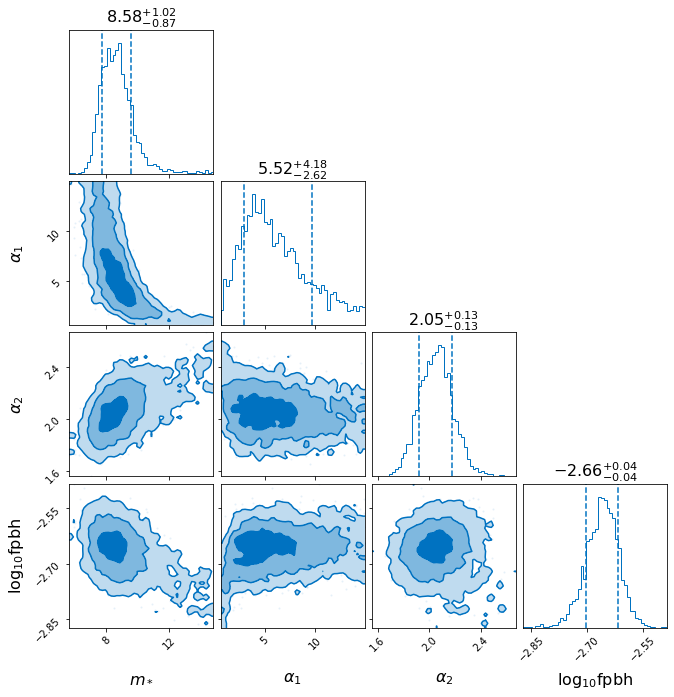

In [6]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=32, parallel=2000, check_point_delta_t=60)
result.plot_corner()


In [7]:
import numpy as np
np.exp(-1059.681-(-1059.303))

0.685230500665919

In [8]:
import numpy as np
np.exp(-1059.681-(-1060.368))

1.987743349398055

In [9]:
import matplotlib.lines as mlines

outdir1 = "H0_GWTC-3_PBH-bpower-1st_flatLCDM_8/"
outdir2 = "H0_GWTC-3_PBH-bpower-2nd_flatLCDM_5/"

posteriors1 = np.loadtxt(f"{outdir1}/dynesty_samples.dat", skiprows=1)
posteriors2 = np.loadtxt(f"{outdir2}/dynesty_samples.dat", skiprows=1)

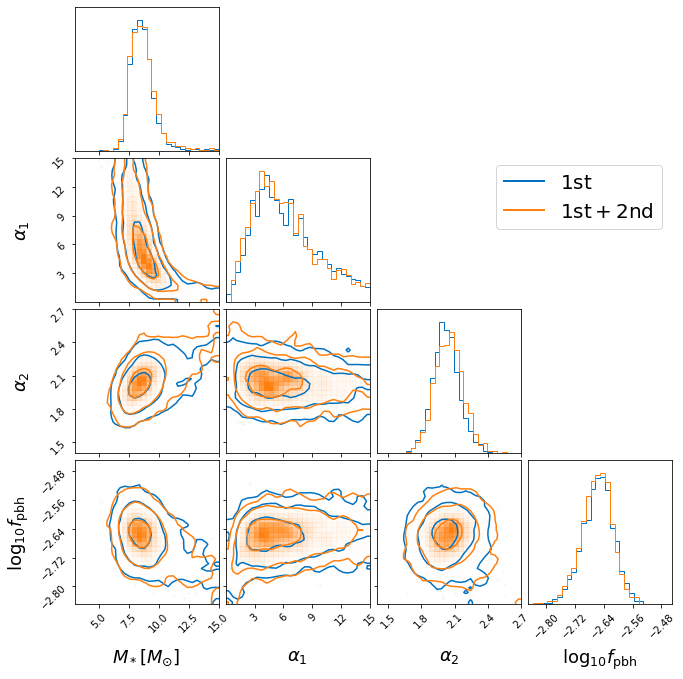

In [19]:
fig = corner.corner(posteriors1, bins=30, smooth=0.9, color='#0072C1', labels=[r"$M_*[M_{\odot}]$", r"$\alpha_1$", r"$\alpha_2$", r"$\log_{10}f_\mathrm{pbh}$"],
                    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), plot_density=True, plot_datapoints=True, fill_contours=False,
                    show_titles=False, title_kwargs={"fontsize": 18}, label_kwargs=dict(fontsize=18), range=((3, 15), (0, 15), (1.4, 2.7), (-2.85, -2.45)))

corner.corner(posteriors2, bins=30, smooth=0.9, color='#FF7F0E', labels=[r"$M_*[M_{\odot}]$", r"$\alpha_1$", r"$\alpha_2$", r"$\log_{10}f_\mathrm{pbh}$"],
              levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), plot_density=True, plot_datapoints=True, fill_contours=False,
              show_titles=False, title_kwargs={"fontsize": 18}, label_kwargs=dict(fontsize=18), range=((3, 15), (0, 15), (1.4, 2.7), (-2.85, -2.45)), fig=fig)

blue_line = mlines.Line2D([], [], color='#0072C1', lw=2, label=r'$\rm{1st}$')
orange_line = mlines.Line2D([], [], color='#FF7F0E', lw=2, label=r'$\rm{1st+2nd}$')
plt.legend(handles=[blue_line, orange_line], bbox_to_anchor=(
    1, 3.12), loc='upper right', fontsize=20)  # prop={'size': 8})
plt.savefig("../latex/post-bpower.pdf")


In [11]:
def get_credibles(posts):
    x_low, x_median, x_up = np.quantile(posts, [0.05, 0.5, 0.95])
    return x_median, (x_up - x_median), (x_median - x_low)

In [12]:
posts = posteriors2[:, 0]
get_credibles(posts)

(8.577761574382968, 2.1495897417844088, 1.2869388530857746)

In [13]:
posts = posteriors2[:, 1]
get_credibles(posts)

(5.580436222522744, 7.123537126525244, 3.815197259824316)

In [14]:
posts = posteriors2[:, 2]
get_credibles(posts)

(2.0493970562483588, 0.21835913085030167, 0.20964424697635398)

In [15]:
posts = posteriors2[:, 3]
get_credibles(posts)

(-2.658461218847613, 0.06414722313133892, 0.07805943662681525)